In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('car data.csv')
df2 = 2021 - df['Year']
df['NewYear'] = df2
df.drop(['Car_Name','Year'],axis =1,inplace=True)
final_dataset = pd.get_dummies(df,drop_first=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NewYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [17]:
X_new = final_dataset.drop(['Kms_Driven','Owner','Fuel_Type_Petrol','Selling_Price'],axis =1)
y = final_dataset['Selling_Price']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

#### Feature Scaling #####
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
final_dataset.shape

(301, 9)

In [19]:
from sklearn  import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

r2 square value 0.8871260418533811


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 0.9793421052631578
MSE: 3.6080993421052634
RMSE: 1.8994997610174273


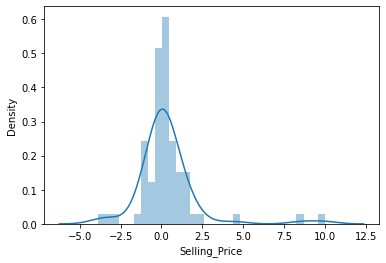

In [20]:
########### calculating r-squared #############
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 square value",re)
sns.distplot(y_test-y_pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NOTE: random state = 10 and n_neighbors value is "4" then r2 is :0.92
    random state = 10 and n_neighbors value is "3" then r2 is :0.9133  
    random state = 10 and n_neighbors value is "7" then r2 is :0.89
    random state = 5 and n_neighbors value is "7" then r2 is :0.85
    random state = 5 and n_neighbors value is "2" then r2 is :0.899
        

In [21]:
################ Grid Serach CV ################
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1, 2,3,4,5,6,7,8,9,10,11]}

grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           verbose = 5,
                           cv = 10,
                           n_jobs = -1)

In [22]:
grid_search = grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [23]:
grid_search.best_params_

{'n_neighbors': 1}

r2 square value 0.8633688411311576


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 1.071578947368421
MSE: 4.367515789473684
RMSE: 2.0898602320427275


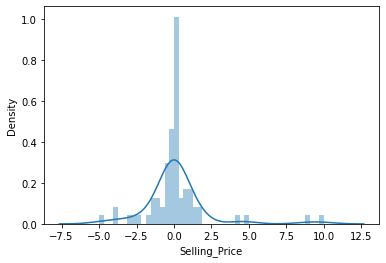

In [24]:
from sklearn  import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
########### calculating r-squared #############
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 square value",re)
sns.distplot(y_test-y_pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [25]:
knn.score(X_train_scaled,y_train)

0.9983036083532919

In [26]:
knn.score(X_test_scaled,y_test)

0.8633688411311576

In [27]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_scaled, y_train)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.0898602320427275
RMSE value for k=  2 is: 1.8994997610174273
RMSE value for k=  3 is: 2.0783359712415908
RMSE value for k=  4 is: 2.1742237914701272
RMSE value for k=  5 is: 2.2114280930037755
RMSE value for k=  6 is: 2.3092092438476306
RMSE value for k=  7 is: 2.386231535255878
RMSE value for k=  8 is: 2.43707669654353
RMSE value for k=  9 is: 2.453238871708872
RMSE value for k=  10 is: 2.484715895016444
RMSE value for k=  11 is: 2.576168698074631
RMSE value for k=  12 is: 2.6200492753781095
RMSE value for k=  13 is: 2.7321200755902297
RMSE value for k=  14 is: 2.7903489087855076
RMSE value for k=  15 is: 2.8487377783545753
RMSE value for k=  16 is: 2.8647403062054955
RMSE value for k=  17 is: 2.8925197684717414
RMSE value for k=  18 is: 2.925041896147305
RMSE value for k=  19 is: 2.9876009365911242
RMSE value for k=  20 is: 3.069131451262976


<AxesSubplot:>

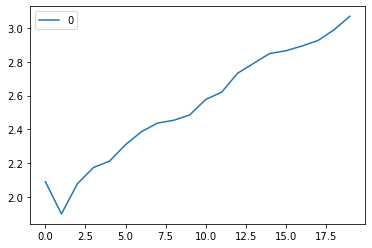

In [28]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [29]:
curve.head()

,0
0,2.089860
1,1.899500
2,2.078336
3,2.174224
4,2.211428
